# Seoul Wind Data

## import

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

## 서울 geometry 데이터 로드

In [2]:
sgg = gpd.read_file('data/Point in Polygon_data/SGG_ADM.shp',encoding='euc-kr')
sgg = sgg.to_crs('epsg:5179')
sgg.head(10)

,ADM_CODE,ADM_SEQ,SID_NAME,SGG_NAME,GU_NAME,EMD_NAME,geometry
0,1111000000,0,서울특별시,종로구,None,None,"POLYGON ((953810.563 1952337.128, 953809.256 1..."
1,1111000000,1,서울특별시,종로구,None,None,"POLYGON ((957908.213 1953288.506, 957908.250 1..."
2,1114000000,0,서울특별시,중구,None,None,"POLYGON ((953223.283 1951423.229, 953222.995 1..."
3,1117000000,0,서울특별시,용산구,None,None,"POLYGON ((951732.101 1948810.620, 951730.202 1..."
4,1120000000,0,서울특별시,성동구,None,None,"POLYGON ((957862.279 1951051.732, 957862.893 1..."
5,1121500000,0,서울특별시,광진구,None,None,"POLYGON ((962563.167 1952015.809, 962562.408 1..."
6,1123000000,0,서울특별시,동대문구,None,None,"POLYGON ((959606.602 1952689.673, 959606.533 1..."
7,1126000000,0,서울특별시,중랑구,None,None,"POLYGON ((964948.124 1953356.209, 964948.286 1..."
8,1129000000,0,서울특별시,성북구,None,None,"POLYGON ((954697.368 1956189.939, 954691.701 1..."
9,1130500000,0,서울특별시,강북구,None,None,"POLYGON ((954585.382 1960364.049, 954584.871 1..."


In [3]:
seoul = sgg[sgg['SID_NAME'].isin(['서울특별시'])]
seoul.head(10)

,ADM_CODE,ADM_SEQ,SID_NAME,SGG_NAME,GU_NAME,EMD_NAME,geometry
0,1111000000,0,서울특별시,종로구,None,None,"POLYGON ((953810.563 1952337.128, 953809.256 1..."
1,1111000000,1,서울특별시,종로구,None,None,"POLYGON ((957908.213 1953288.506, 957908.250 1..."
2,1114000000,0,서울특별시,중구,None,None,"POLYGON ((953223.283 1951423.229, 953222.995 1..."
3,1117000000,0,서울특별시,용산구,None,None,"POLYGON ((951732.101 1948810.620, 951730.202 1..."
4,1120000000,0,서울특별시,성동구,None,None,"POLYGON ((957862.279 1951051.732, 957862.893 1..."
5,1121500000,0,서울특별시,광진구,None,None,"POLYGON ((962563.167 1952015.809, 962562.408 1..."
6,1123000000,0,서울특별시,동대문구,None,None,"POLYGON ((959606.602 1952689.673, 959606.533 1..."
7,1126000000,0,서울특별시,중랑구,None,None,"POLYGON ((964948.124 1953356.209, 964948.286 1..."
8,1129000000,0,서울특별시,성북구,None,None,"POLYGON ((954697.368 1956189.939, 954691.701 1..."
9,1130500000,0,서울특별시,강북구,None,None,"POLYGON ((954585.382 1960364.049, 954584.871 1..."


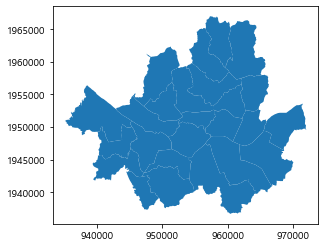

In [4]:
seoul.plot()

## 서울 500x500 (총 5644 개 Point) 바람 데이터 로드

### 10m 2020-05-27 ~ 2020-06-11 바람 데이터 로드

In [184]:
wind10 = pd.read_csv('data/IBM_Wind/Normal_Data/week1/Seoul_Wind10_2020.05.27_14h48m14s.csv')
wind10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 17 columns):
latitude           5644 non-null float64
longitude          5644 non-null float64
height             5644 non-null float64
version            5644 non-null object
serviceTime        5644 non-null float64
procTime           5644 non-null object
initTimeUtc        5644 non-null object
landuse            5644 non-null int64
requestId          5644 non-null int64
resource           5644 non-null object
elevation          5644 non-null float64
windU-component    5644 non-null object
windV-component    5644 non-null object
density            5644 non-null object
windDir            5644 non-null object
windSpeed          5644 non-null object
validTimeUtc       5644 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 749.7+ KB


### 10m 2020-06-01 ~ 2020-06-17 바람데이터 로드

In [183]:
wind10_2 = pd.read_csv('data/IBM_Wind/Normal_Data/week2/Seoul_Wind10_2020.06.02_02h51m59s.csv')
wind10_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 17 columns):
latitude           5644 non-null float64
longitude          5644 non-null float64
height             5644 non-null float64
version            5644 non-null object
serviceTime        5644 non-null float64
procTime           5644 non-null object
initTimeUtc        5644 non-null object
landuse            5644 non-null int64
requestId          5644 non-null int64
resource           5644 non-null object
elevation          5644 non-null float64
windU-component    5644 non-null object
windV-component    5644 non-null object
density            5644 non-null object
windDir            5644 non-null object
windSpeed          5644 non-null object
validTimeUtc       5644 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 749.7+ KB


### 60m 2020-05-27 ~ 2020-06-11 바람 데이터 로드

In [180]:
wind = pd.read_csv('data/IBM_Wind/Normal_Data/week1/Seoul_Wind60_2020.05.28_01h44m23s.csv')
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 17 columns):
latitude           5644 non-null float64
longitude          5644 non-null float64
height             5644 non-null float64
version            5644 non-null object
serviceTime        5644 non-null float64
procTime           5644 non-null object
initTimeUtc        5644 non-null object
landuse            5644 non-null int64
requestId          5644 non-null int64
resource           5644 non-null object
elevation          5644 non-null float64
windU-component    5644 non-null object
windV-component    5644 non-null object
density            5644 non-null object
windDir            5644 non-null object
windSpeed          5644 non-null object
validTimeUtc       5644 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 749.7+ KB


### 120m 2020-05-28 ~ 2020-06-13 바람 데이터 로드

In [181]:
wind = pd.read_csv('data/IBM_Wind/Normal_Data/week1/Seoul_Wind120_2020.05.29_01h45m54s.csv')
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 17 columns):
latitude           5644 non-null float64
longitude          5644 non-null float64
height             5644 non-null float64
version            5644 non-null object
serviceTime        5644 non-null float64
procTime           5644 non-null object
initTimeUtc        5644 non-null object
landuse            5644 non-null int64
requestId          5644 non-null int64
resource           5644 non-null object
elevation          5644 non-null float64
windU-component    5644 non-null object
windV-component    5644 non-null object
density            5644 non-null object
windDir            5644 non-null object
windSpeed          5644 non-null object
validTimeUtc       5644 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 749.7+ KB


### 240m 2020-05-29 ~ 2020-06-14 바람 데이터 로드

In [182]:
wind = pd.read_csv('data/IBM_Wind/Normal_Data/week1/Seoul_Wind240_2020.05.30_01h47m12s.csv')
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 17 columns):
latitude           5644 non-null float64
longitude          5644 non-null float64
height             5644 non-null float64
version            5644 non-null object
serviceTime        5644 non-null float64
procTime           5644 non-null object
initTimeUtc        5644 non-null object
landuse            5644 non-null int64
requestId          5644 non-null int64
resource           5644 non-null object
elevation          5644 non-null float64
windU-component    5644 non-null object
windV-component    5644 non-null object
density            5644 non-null object
windDir            5644 non-null object
windSpeed          5644 non-null object
validTimeUtc       5644 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 749.7+ KB


### 한컬럼에 '|' 로 나뉘어 한꺼번에 들어가있는 데이터 row로 풀어주기

In [194]:
uc = wind10_2['windU-component'].str.split('|')
uc

0       [3.89, 3.04, 2.23, 1.51, 0.78, 0.3, -0.27, -0....
1       [3.92, 3.07, 2.24, 1.5, 0.78, 0.31, -0.26, -0....
2       [3.92, 3.07, 2.24, 1.5, 0.78, 0.31, -0.26, -0....
3       [3.92, 3.07, 2.24, 1.5, 0.78, 0.31, -0.26, -0....
4       [3.92, 3.06, 2.23, 1.5, 0.77, 0.32, -0.24, -0....
5       [3.92, 3.06, 2.23, 1.5, 0.77, 0.32, -0.24, -0....
6       [3.89, 3.05, 2.22, 1.47, 0.76, 0.32, -0.23, -0...
7       [3.89, 3.05, 2.22, 1.47, 0.76, 0.32, -0.23, -0...
8       [3.87, 3.02, 2.2, 1.46, 0.75, 0.32, -0.21, -0....
9       [3.87, 3.02, 2.2, 1.46, 0.75, 0.32, -0.21, -0....
10      [3.87, 3.02, 2.2, 1.46, 0.75, 0.32, -0.21, -0....
11      [3.85, 3.01, 2.18, 1.44, 0.73, 0.33, -0.19, -0...
12      [3.85, 3.01, 2.18, 1.44, 0.73, 0.33, -0.19, -0...
13      [3.83, 3.0, 2.17, 1.42, 0.72, 0.33, -0.18, -0....
14      [3.83, 3.0, 2.17, 1.42, 0.72, 0.33, -0.18, -0....
15      [3.82, 2.99, 2.16, 1.41, 0.71, 0.34, -0.16, -0...
16      [3.82, 2.99, 2.16, 1.41, 0.71, 0.34, -0.16, -0...
17      [3.82,

In [195]:
split = uc.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('U-comp')
split

,U-comp
0,3.89
0,3.04
0,2.23
0,1.51
0,0.78
0,0.3
0,-0.27
0,-0.7
0,-1.07
0,-1.53


In [196]:
wd10_2 = wind10_2.merge(split, left_index=True, right_index=True, how='left')

In [197]:
columns = ['windU-component','windV-component','density','windDir','windSpeed','validTimeUtc']

for col in columns :
    uc = wind10_2[col].str.split('|')
    split = uc.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame(col)
    wd10_2[col] = pd.merge(wind10_2,split, left_index=True, right_index=True, how='left')[str(col)+str('_y')]

In [198]:
wd10_2[['windU-component','windV-component','density','windDir','windSpeed']] = wd10_2[['windU-component','windV-component','density','windDir','windSpeed']].astype('float')

In [199]:
wd10_2.drop(['U-comp','version','serviceTime','procTime','initTimeUtc','requestId','resource'],axis=1,inplace=True)
wd10_2

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc
0,37.421640,126.758966,10.0,1,500.0,3.89,0.46,1.1665,263.18,3.91,2020-06-01 20:00:00
0,37.421640,126.758966,10.0,1,500.0,3.04,0.56,1.1687,259.48,3.10,2020-06-01 21:00:00
0,37.421640,126.758966,10.0,1,500.0,2.23,0.99,1.1704,245.97,2.48,2020-06-01 22:00:00
0,37.421640,126.758966,10.0,1,500.0,1.51,1.60,1.1717,223.25,2.23,2020-06-01 23:00:00
0,37.421640,126.758966,10.0,1,500.0,0.78,2.11,1.1728,200.20,2.28,2020-06-02 00:00:00
0,37.421640,126.758966,10.0,1,500.0,0.30,2.38,1.1735,187.29,2.46,2020-06-02 01:00:00
0,37.421640,126.758966,10.0,1,500.0,-0.27,2.39,1.1740,173.45,2.49,2020-06-02 02:00:00
0,37.421640,126.758966,10.0,1,500.0,-0.70,2.44,1.1742,163.99,2.61,2020-06-02 03:00:00
0,37.421640,126.758966,10.0,1,500.0,-1.07,2.30,1.1755,155.09,2.62,2020-06-02 04:00:00
0,37.421640,126.758966,10.0,1,500.0,-1.53,2.03,1.1759,143.12,2.61,2020-06-02 05:00:00


In [192]:
wd10.describe()

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed
count,2.037484e+06,2.037484e+06,2037484.0,2037484.0,2037484.0,2.037484e+06,2.037484e+06,2.037484e+06,2.037484e+06,2.037484e+06
mean,3.756485e+01,1.269800e+02,10.0,1.0,500.0,1.253299e+00,9.287616e-01,1.159453e+00,2.151945e+02,2.556918e+00
std,8.385716e-02,1.291327e-01,0.0,0.0,0.0,1.473038e+00,9.571997e-01,1.618621e-02,5.256834e+01,1.196174e+00
min,3.742164e+01,1.267590e+02,10.0,1.0,500.0,-1.420000e+00,-1.440000e+00,1.118600e+00,1.000000e-02,4.800000e-01
25%,3.749331e+01,1.268668e+02,10.0,1.0,500.0,1.000000e-02,2.800000e-01,1.146900e+00,1.807000e+02,1.670000e+00
50%,3.756490e+01,1.269800e+02,10.0,1.0,500.0,9.700000e-01,7.500000e-01,1.159300e+00,2.266100e+02,2.240000e+00
75%,3.763643e+01,1.270931e+02,10.0,1.0,500.0,2.360000e+00,1.440000e+00,1.173200e+00,2.539400e+02,3.300000e+00
max,3.770789e+01,1.272009e+02,10.0,1.0,500.0,5.490000e+00,4.750000e+00,1.194000e+00,3.600000e+02,6.780000e+00


In [200]:
wd10_2.describe()

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed
count,2.037484e+06,2.037484e+06,2037484.0,2037484.0,2037484.0,2.037484e+06,2.037484e+06,2.037484e+06,2.037484e+06,2.037484e+06
mean,3.756485e+01,1.269800e+02,10.0,1.0,500.0,7.589215e-01,5.408949e-01,1.151321e+00,2.003129e+02,2.560499e+00
std,8.385716e-02,1.291327e-01,0.0,0.0,0.0,1.505349e+00,9.306542e-01,1.538193e-02,7.741899e+01,1.026215e+00
min,3.742164e+01,1.267590e+02,10.0,1.0,500.0,-2.600000e+00,-2.520000e+00,1.111600e+00,2.000000e-02,6.000000e-01
25%,3.749331e+01,1.268668e+02,10.0,1.0,500.0,-3.600000e-01,-2.000000e-02,1.141400e+00,1.338800e+02,1.800000e+00
50%,3.756490e+01,1.269800e+02,10.0,1.0,500.0,5.200000e-01,3.900000e-01,1.153100e+00,2.205300e+02,2.300000e+00
75%,3.763643e+01,1.270931e+02,10.0,1.0,500.0,1.800000e+00,9.600000e-01,1.162900e+00,2.601000e+02,3.160000e+00
max,3.770789e+01,1.272009e+02,10.0,1.0,500.0,5.850000e+00,6.740000e+00,1.182800e+00,3.600000e+02,7.560000e+00


In [201]:
wd10_2['validTimeUtc'] = pd.to_datetime(wd10_2['validTimeUtc'])

In [14]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037484 entries, 0 to 5643
Data columns (total 11 columns):
latitude           float64
longitude          float64
height             float64
landuse            int64
elevation          float64
windU-component    float64
windV-component    float64
density            float64
windDir            float64
windSpeed          float64
validTimeUtc       datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 186.5 MB


## 10m 데이터 같은날짜와 시각 데이터가 다르게 예측되었는지 확인

In [229]:
wd10[wd10['validTimeUtc']== '2020-06-02 11:00:00']

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc
0,37.421640,126.758966,10.0,1,500.0,1.55,3.46,1.1492,204.09,4.19,2020-06-02 11:00:00
1,37.425920,126.758966,10.0,1,500.0,1.55,3.47,1.1492,204.10,4.20,2020-06-02 11:00:00
2,37.430200,126.758966,10.0,1,500.0,1.55,3.47,1.1492,204.10,4.20,2020-06-02 11:00:00
3,37.434480,126.758966,10.0,1,500.0,1.55,3.47,1.1492,204.10,4.20,2020-06-02 11:00:00
4,37.438760,126.758966,10.0,1,500.0,1.57,3.48,1.1491,204.22,4.21,2020-06-02 11:00:00
5,37.443040,126.758966,10.0,1,500.0,1.57,3.48,1.1491,204.22,4.21,2020-06-02 11:00:00
6,37.447319,126.758966,10.0,1,500.0,1.58,3.48,1.1489,204.42,4.21,2020-06-02 11:00:00
7,37.451598,126.758966,10.0,1,500.0,1.58,3.48,1.1489,204.42,4.21,2020-06-02 11:00:00
8,37.455877,126.758966,10.0,1,500.0,1.59,3.48,1.1487,204.62,4.21,2020-06-02 11:00:00
9,37.460155,126.758966,10.0,1,500.0,1.59,3.48,1.1487,204.62,4.21,2020-06-02 11:00:00


In [228]:
wd10_2[wd10_2['validTimeUtc']== '2020-06-02 11:00:00']

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc
0,37.421640,126.758966,10.0,1,500.0,-2.17,0.66,1.1637,106.91,2.91,2020-06-02 11:00:00
1,37.425920,126.758966,10.0,1,500.0,-2.20,0.58,1.1638,104.67,2.94,2020-06-02 11:00:00
2,37.430200,126.758966,10.0,1,500.0,-2.20,0.58,1.1638,104.67,2.94,2020-06-02 11:00:00
3,37.434480,126.758966,10.0,1,500.0,-2.20,0.58,1.1638,104.67,2.94,2020-06-02 11:00:00
4,37.438760,126.758966,10.0,1,500.0,-2.22,0.48,1.1640,102.14,2.95,2020-06-02 11:00:00
5,37.443040,126.758966,10.0,1,500.0,-2.22,0.48,1.1640,102.14,2.95,2020-06-02 11:00:00
6,37.447319,126.758966,10.0,1,500.0,-2.23,0.37,1.1641,99.41,2.95,2020-06-02 11:00:00
7,37.451598,126.758966,10.0,1,500.0,-2.23,0.37,1.1641,99.41,2.95,2020-06-02 11:00:00
8,37.455877,126.758966,10.0,1,500.0,-2.25,0.26,1.1642,96.70,2.96,2020-06-02 11:00:00
9,37.460155,126.758966,10.0,1,500.0,-2.25,0.26,1.1642,96.70,2.96,2020-06-02 11:00:00


## 2020-05-27 13:00:00 바람 시각화 

In [178]:
wd[wd['validTimeUtc']=='2020-06-01 13:00:00']

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc
0,37.421640,126.758966,10.0,1,500.0,3.32,0.28,1.1544,265.19,3.51,2020-06-01 13:00:00
1,37.425920,126.758966,10.0,1,500.0,3.33,0.35,1.1543,263.92,3.53,2020-06-01 13:00:00
2,37.430200,126.758966,10.0,1,500.0,3.33,0.35,1.1543,263.92,3.53,2020-06-01 13:00:00
3,37.434480,126.758966,10.0,1,500.0,3.33,0.35,1.1543,263.92,3.53,2020-06-01 13:00:00
4,37.438760,126.758966,10.0,1,500.0,3.33,0.43,1.1538,262.57,3.53,2020-06-01 13:00:00
5,37.443040,126.758966,10.0,1,500.0,3.33,0.43,1.1538,262.57,3.53,2020-06-01 13:00:00
6,37.447319,126.758966,10.0,1,500.0,3.31,0.52,1.1532,261.13,3.52,2020-06-01 13:00:00
7,37.451598,126.758966,10.0,1,500.0,3.31,0.52,1.1532,261.13,3.52,2020-06-01 13:00:00
8,37.455877,126.758966,10.0,1,500.0,3.30,0.60,1.1526,259.68,3.52,2020-06-01 13:00:00
9,37.460155,126.758966,10.0,1,500.0,3.30,0.60,1.1526,259.68,3.52,2020-06-01 13:00:00


In [143]:
test = wd[wd['validTimeUtc']=='2020-06-11 12:00:00']

In [23]:
test1 = wd[wd['validTimeUtc']=='2020-06-06 19:00:00']

In [127]:
geom_wind = gpd.points_from_xy(test.longitude,test.latitude)
winddata = gpd.GeoDataFrame(test,geometry=geom_wind, crs='epsg:4326')
#winddata.set_index('validTimeUtc',inplace=True)

In [24]:
geom_wind = gpd.points_from_xy(test1.longitude,test1.latitude)
winddata1 = gpd.GeoDataFrame(test1,geometry=geom_wind, crs='epsg:4326')
#winddata.set_index('validTimeUtc',inplace=True)

In [36]:
winddata1.describe()

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed
count,5644.000000,5644.000000,5644.0,5644.0,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,37.564854,126.979952,10.0,1.0,500.0,2.371339,1.020002,1.162657,246.681481,3.321077
std,0.083865,0.129144,0.0,0.0,0.0,0.143593,0.092482,0.005685,2.399240,0.137299
min,37.421640,126.758966,10.0,1.0,500.0,2.060000,0.820000,1.151700,240.090000,3.030000
25%,37.493305,126.866764,10.0,1.0,500.0,2.270000,0.950000,1.157800,244.930000,3.230000
50%,37.564902,126.979952,10.0,1.0,500.0,2.370000,1.030000,1.161600,246.820000,3.310000
75%,37.636429,127.093140,10.0,1.0,500.0,2.450000,1.090000,1.167700,248.590000,3.390000
max,37.707888,127.200938,10.0,1.0,500.0,3.060000,1.360000,1.174500,250.920000,4.070000


In [83]:
winddata

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc,geometry
0,37.421640,126.758966,10.0,1,500.0,0.39,1.74,1.1738,192.66,2.64,2020-06-11 10:00:00,POINT (126.75897 37.42164)
1,37.425920,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (126.75897 37.42592)
2,37.430200,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (126.75897 37.43020)
3,37.434480,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (126.75897 37.43448)
4,37.438760,126.758966,10.0,1,500.0,0.41,1.77,1.1736,193.11,2.67,2020-06-11 10:00:00,POINT (126.75897 37.43876)
5,37.443040,126.758966,10.0,1,500.0,0.41,1.77,1.1736,193.11,2.67,2020-06-11 10:00:00,POINT (126.75897 37.44304)
6,37.447319,126.758966,10.0,1,500.0,0.42,1.78,1.1735,193.31,2.68,2020-06-11 10:00:00,POINT (126.75897 37.44732)
7,37.451598,126.758966,10.0,1,500.0,0.42,1.78,1.1735,193.31,2.68,2020-06-11 10:00:00,POINT (126.75897 37.45160)
8,37.455877,126.758966,10.0,1,500.0,0.43,1.80,1.1734,193.49,2.70,2020-06-11 10:00:00,POINT (126.75897 37.45588)
9,37.460155,126.758966,10.0,1,500.0,0.43,1.80,1.1734,193.49,2.70,2020-06-11 10:00:00,POINT (126.75897 37.46016)


In [84]:
winddata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
winddata = winddata.to_crs('epsg:5179')

In [25]:
winddata1 = winddata1.to_crs('epsg:5179')

In [88]:
winddata

,latitude,longitude,height,landuse,elevation,windU-component,windV-component,density,windDir,windSpeed,validTimeUtc,geometry
0,37.421640,126.758966,10.0,1,500.0,0.39,1.74,1.1738,192.66,2.64,2020-06-11 10:00:00,POINT (934431.121 1936090.564)
1,37.425920,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (934434.853 1936565.452)
2,37.430200,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (934438.586 1937040.314)
3,37.434480,126.758966,10.0,1,500.0,0.40,1.75,1.1737,192.90,2.65,2020-06-11 10:00:00,POINT (934442.319 1937515.150)
4,37.438760,126.758966,10.0,1,500.0,0.41,1.77,1.1736,193.11,2.67,2020-06-11 10:00:00,POINT (934446.052 1937989.958)
5,37.443040,126.758966,10.0,1,500.0,0.41,1.77,1.1736,193.11,2.67,2020-06-11 10:00:00,POINT (934449.786 1938464.739)
6,37.447319,126.758966,10.0,1,500.0,0.42,1.78,1.1735,193.31,2.68,2020-06-11 10:00:00,POINT (934453.519 1938939.494)
7,37.451598,126.758966,10.0,1,500.0,0.42,1.78,1.1735,193.31,2.68,2020-06-11 10:00:00,POINT (934457.253 1939414.222)
8,37.455877,126.758966,10.0,1,500.0,0.43,1.80,1.1734,193.49,2.70,2020-06-11 10:00:00,POINT (934460.987 1939888.923)
9,37.460155,126.758966,10.0,1,500.0,0.43,1.80,1.1734,193.49,2.70,2020-06-11 10:00:00,POINT (934464.721 1940363.597)


In [131]:
geom = []
ratio = 1.0/4.0
for i in range(len(winddata)):
    a = winddata.iloc[i,11]
    b = Point(a.x+ratio*winddata.iloc[i,6]*470, a.y+ratio*winddata.iloc[i,7]*470)
    geom.append(LineString([(a),(b)]))

gs = gpd.GeoSeries(geom)

## 바람 시각화

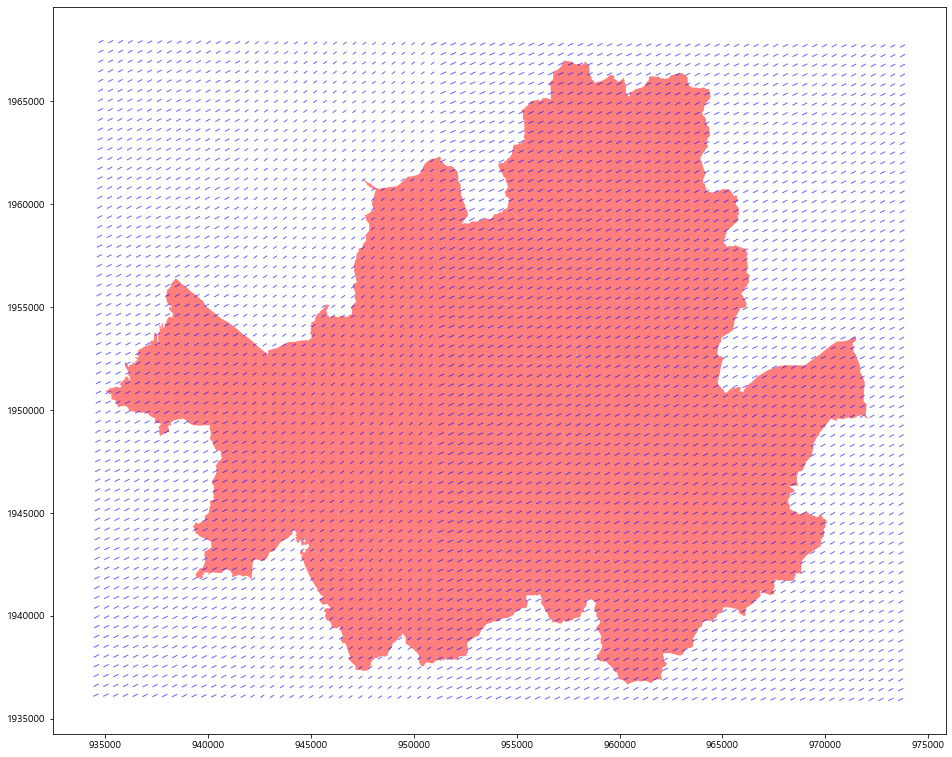

In [132]:
fig,ax = plt.subplots(figsize=(16,16))
gs.plot(ax=ax,color='b',alpha=0.6, linewidth=1)
#gs1.plot(ax=ax,color='r',alpha=0.6)
seoul.plot(ax=ax,color='r',alpha=0.5)

In [133]:
seoul_wind240_061312 = gpd.GeoDataFrame(geometry = gs)

In [134]:
seoul_wind240_061312.to_file('seoul_wind240_061312.shp',driver='ESRI Shapefile')